# SEIAR model for disease propagation

This model is more complete since it assumes people infected non-reported or asymptomatic. 

Assume the total population is:

\begin{equation}
N = S(t) + E(t) + I(t) + A(t) + R(t)  
\end{equation}

With,

$S$: the susceptible population

$E$: the exposed population

$I$: the infected pupulation 

$A$: assyntomatic infected

$A$: the recovered population

These quantities evolve according to the following the dynamical ODEs:




\begin{eqnarray}
\frac{d S}{dt} &=& - \frac{\beta}{N}SI - \frac{\mu \beta}{N}SA - \theta \frac{mS}{N-I} +  \theta \frac{nS}{N-I} \\ 
\frac{d E}{dt} &=& \frac{\beta}{N}SI + \frac{\mu \beta}{N}SA -E/Z -  \theta \frac{mE}{N-I} + \theta \frac{nE}{N-I}   \\ 
\frac{d I}{dt} &=&  \alpha \frac{E}{Z} - I/D  \\ 
\frac{d A}{dt} &=& (1-\alpha)  \frac{E}{Z}  -\frac{A}{D} - \theta \frac{mA}{N-I} +  \theta \frac{nA}{N-A}   \\ 
\frac{d R}{dt} &=& \frac{I}{D} +  \frac{A}{D} - mR
\end{eqnarray}

### Parameters:

* $\beta$: transmission rate
* $\mu$: transmission rate due to undocumented individuals is reduced by this factor
* $\alpha$: fraction of documented infections
* $Z$: latency period
* $D$: duration of infection
* $\theta$: multiplicative factor for moving
* $m$: rate of people leaving the sample
* $n$: rate of people entering the sample


In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.special import erf
import pandas as pd
from scipy.integrate import odeint

In [108]:
def sird(N,beta,nu,theta,Z,D,alpha,m, n):
    n = 720 # time steps    
    tmin = 36   # starting time
    tmax = 365. # ending time
    t = np.linspace(tmin,tmax,n)
    
    # Initial conditions
    
    x0 = N, 0., 1., 7., 0
    sol = odeint(sird_func,x0,t,args=(N, beta, nu, theta, Z, D, alpha, m, n))
        
    return sol[:,0], sol[:,1], sol[:,2], sol[:,3], sol[:,4], t

In [112]:
def sird_func(x, t, *args):
    
    S,E,I,A,R = x
    N, beta, nu, theta, Z, D, alpha, m, n = args
    
    dSdt = -beta*S*I/N - nu*beta*S*A/N #  + theta*m*S/(N-I) - theta*n*S/(N-I)
    dEdt =  beta*S*I/N + nu*beta*S*A/N - E/Z - theta*m*E/(N-I) + theta*n*S/(N-I)
    dIdt =  alpha*E/Z - I/D
    dAdt =  (1.-alpha)*E/Z - A/D - theta*m*A/(N-I) 
    dRdt =  I/(D+Z) + A/(D+Z) - m*R - 0.01*R
    
    return dSdt,dEdt,dIdt,dAdt,dRdt

In [143]:
sI, eI, iI, aI, rI, t = sird(N=2.1e8, beta=1.7, nu=0.55,theta = 1.36, Z= 3.69, D=3.48, alpha=0.0014, m=0., n=0.)

<IPython.core.display.Javascript object>


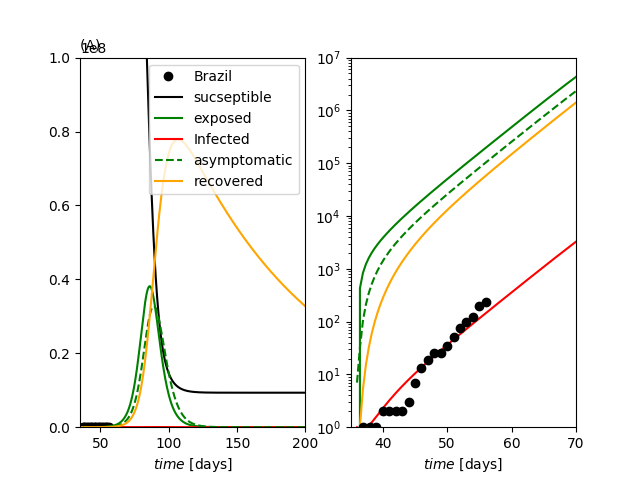

Text(0.5, 0, '$time$ [days]')

In [147]:
%matplotlib notebook
tI = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')
tD = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv')
Brazil = np.array(tI.Brazil)
time = np.array(tI.date)
ii = np.argwhere(np.isnan(Brazil)==False)
ii = ii.T[0,:]

fig, ax = plt.subplots(1,2)
ax[0].set_title('(A) ',fontsize=10,loc='left')
ax[0].plot(ii,Brazil[ii],'o',label='Brazil',c='k')

ax[0].plot(t,sI,label='sucseptible',c='k')
ax[0].plot(t,eI,label='exposed',c='g')
ax[0].plot(t,iI,label='Infected', c='r')
ax[0].plot(t,aI,label='asymptomatic',c='g',linestyle='--')
ax[0].plot(t,rI,label='recovered',c='orange')

ax[0].set_xlabel(r'$time$ [days]')
xmin=35
xmax=200
ymin = 0
ymax = 1e8
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.yscale('log')
ax[0].legend()

ax[1].plot(t,sI,label='sucseptible',c='k')
ax[1].plot(t,eI,label='exposed',c='g')
ax[1].plot(t,iI,label='Infected', c='r')
ax[1].plot(t,aI,label='asymptomatic',c='g',linestyle='--')
ax[1].plot(t,rI,label='recovered',c='orange')

ax[1].plot(ii,Brazil[ii],'o',label='Brazil',c='k')
ymin=1e0
ymax=1e7
xmin=35
xmax=70
ax[1].set_ylim(ymin,ymax)
ax[1].set_xlim(xmin,xmax)

ax[1].set_xlabel(r'$time$ [days]')



